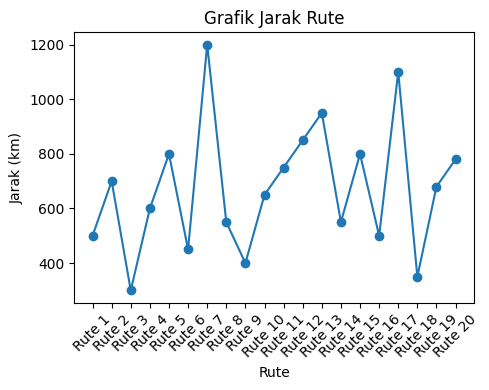

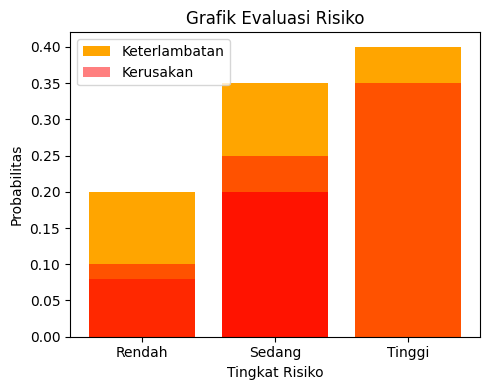

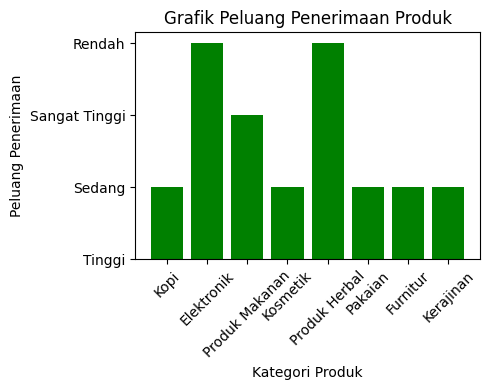

In [15]:
import pandas as pd
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import messagebox

class DataLoader:
    @staticmethod
    def load_data():
        try:
            df_rute = pd.read_csv('data_rute.csv')
            df_risiko = pd.read_csv('data_risiko.csv')
            df_pasar = pd.read_csv('data_pasar.csv')
            df_rekomendasi = pd.read_csv('data_rekomendasi.csv')
            return df_rute, df_risiko, df_pasar, df_rekomendasi
        except Exception as e:
            messagebox.showerror("Error", f"Terjadi kesalahan saat memuat data: {e}")
            return None, None, None, None

class RouteOptimizer:
    def __init__(self, routes_data):
        self.routes_data = routes_data

    def get_random_route(self):
        return self.routes_data.sample(n=1).iloc[0]

class RiskEvaluator:
    def __init__(self, risk_data):
        self.risk_data = risk_data

    def evaluate_risk(self, risk_level):
        risk_info = self.risk_data[self.risk_data['tingkat_risiko'] == risk_level]
        if not risk_info.empty:
            return {
                "probabilitas_keterlambatan": risk_info['probabilitas_keterlambatan'].values[0],
                "probabilitas_kerusakan": risk_info['probabilitas_kerusakan'].values[0],
                "tindakan_mitigasi": risk_info['tindakan_mitigasi'].values[0]
            }
        else:
            return None

class MarketEvaluator:
    def __init__(self, market_data):
        self.market_data = market_data

    def predict_acceptance(self, country, product_category):
        acceptance_data = self.market_data[
            (self.market_data['negara'] == country) & 
            (self.market_data['kategori_produk'] == product_category)
        ]
        if not acceptance_data.empty:
            return acceptance_data['peluang_penerimaan'].values[0]
        else:
            return "Tidak ada data"

class UMKMRecommendation:
    def __init__(self, recommendation_data):
        self.recommendation_data = recommendation_data

    def get_recommendation(self, country):
        rec_data = self.recommendation_data[self.recommendation_data['negara'] == country]
        if not rec_data.empty:
            return rec_data['rekomendasi_umkm'].values[0]
        else:
            return "Rekomendasi tidak tersedia."

class LogisticsApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Diplomasi Ekonomi & Pemberdayaan UMKM")
        self.frame = tk.Frame(root, padx=5, pady=5, bg="#f2f2f2") 
        self.frame.pack(fill=tk.BOTH, expand=True)

        tk.Label(self.frame, text="AI-Driven Simulation and Prediction of SME Product\nAcceptance in International Markets", 
                 font=("Arial", 14, "bold"), fg="#4a90e2", bg="#f2f2f2").pack(pady=5)

        self.create_input_frame()
        
        self.result_frame = tk.Frame(self.frame, bg="#f2f2f2") 
        self.result_frame.pack(pady=5)

        self.route_btn = tk.Button(self.frame, text="Simulasi Awal", command=self.run_simulation, bg="#4a90e2", fg="white", font=("Arial", 10, "bold"))
        self.route_btn.pack(pady=5)

        self.reset_btn = tk.Button(self.frame, text="Ulangi Simulasi", command=self.clear_result_frame, bg="#4a90e2", fg="white", font=("Arial", 10, "bold"))
        self.reset_btn.pack(pady=5)

        self.help_btn = tk.Button(self.frame, text="Bantuan", command=self.show_help, bg="#4a90e2", fg="white", font=("Arial", 10, "bold"))
        self.help_btn.pack(pady=5)

        self.routes_data, self.risk_data, self.market_data, self.recommendation_data = DataLoader.load_data()
        if self.routes_data is not None:
            self.optimal_route = None  

    def create_input_frame(self):
        input_frame = tk.Frame(self.frame, bg="#f2f2f2")
        input_frame.pack(pady=5)

        tk.Label(input_frame, text="Negara:", bg="#f2f2f2").grid(row=0, column=0)
        self.country_entry = tk.Entry(input_frame)
        self.country_entry.grid(row=0, column=1)

        tk.Label(input_frame, text="Kategori Produk:", bg="#f2f2f2").grid(row=1, column=0)
        self.product_entry = tk.Entry(input_frame)
        self.product_entry.grid(row=1, column=1)

    def run_simulation(self):
        if self.routes_data is None or self.risk_data is None or self.market_data is None or self.recommendation_data is None:
            messagebox.showerror("Error", "Data tidak berhasil dimuat. Pastikan file CSV tersedia.")
            return
        
        self.clear_result_frame() 
        self.display_route()
        self.display_risk()
        self.display_market_opportunity()
        self.display_recommendation()
        
        self.create_graph_buttons()

    def clear_result_frame(self):
        for widget in self.result_frame.winfo_children():
            widget.destroy()

    def create_info_frame(self, text, color):
        info_frame = tk.Frame(self.result_frame, bg=color, padx=2, pady=2, relief=tk.SUNKEN, bd=1) 
        info_frame.pack(pady=3, fill=tk.X) 
        label = tk.Label(info_frame, text=text, font=("Arial", 9), fg="#333333", bg=color, wraplength=300)  
        label.pack(padx=5, pady=3)  

    def display_route(self):
        optimizer = RouteOptimizer(self.routes_data)
        self.optimal_route = optimizer.get_random_route()  
        route_text = (
            f"🚛 Rute Optimal:\nRute: {self.optimal_route['rute']}\nJarak: {self.optimal_route['jarak_km']} km\n"
            f"Biaya per km: {self.optimal_route['biaya_per_km']}\nWaktu Perjalanan: {self.optimal_route['waktu_perjalanan']} jam"
        )
        self.create_info_frame(route_text, "#e6f7ff") 

    def display_risk(self):
        risk_evaluator = RiskEvaluator(self.risk_data)
        optimal_route_risk = self.optimal_route['risiko']  
        risk_info = risk_evaluator.evaluate_risk(optimal_route_risk)
        if risk_info is not None:
            risk_text = (
                f"⚠️ Evaluasi Risiko:\nRisiko: {optimal_route_risk}\n"
                f"Probabilitas Keterlambatan: {risk_info['probabilitas_keterlambatan']}\n"
                f"Probabilitas Kerusakan: {risk_info['probabilitas_kerusakan']}\n"
                f"Tindakan Mitigasi: {risk_info['tindakan_mitigasi']}"
            )
        else:
            risk_text = "⚠️ Evaluasi Risiko: Data risiko tidak tersedia."
        self.create_info_frame(risk_text, "#ffe6e6")  

    def display_market_opportunity(self):
        market_evaluator = MarketEvaluator(self.market_data)
        country = self.country_entry.get()
        product_category = self.product_entry.get()
        opportunity = market_evaluator.predict_acceptance(country, product_category)
        market_text = (
            f"📈 Peluang Pasar:\nNegara: {country}\nKategori Produk: {product_category}\n"
            f"Peluang Penerimaan: {opportunity}"
        )
        self.create_info_frame(market_text, "#e6ffe6")  

    def display_recommendation(self):
        recommendation_generator = UMKMRecommendation(self.recommendation_data)
        country = self.country_entry.get()
        recommendation = recommendation_generator.get_recommendation(country)
        recommendation_text = f"💡 Rekomendasi UMKM:\nNegara: {country}\n{recommendation}"
        self.create_info_frame(recommendation_text, "#fff0e6")  

    def create_graph_buttons(self):
        tk.Button(self.result_frame, text="Grafik Rute", command=self.plot_route_graph, bg="#4a90e2", fg="white").pack(pady=5)
        tk.Button(self.result_frame, text="Grafik Risiko", command=self.plot_risk_graph, bg="#4a90e2", fg="white").pack(pady=5)
        tk.Button(self.result_frame, text="Grafik Pasar", command=self.plot_market_graph, bg="#4a90e2", fg="white").pack(pady=5)

    def plot_route_graph(self):
        graph_window = tk.Toplevel(self.root)
        graph_window.title("Grafik Rute")
        try:
            plt.figure(figsize=(5, 4))
            plt.plot(self.routes_data['rute'], self.routes_data['jarak_km'], marker='o')
            plt.title('Grafik Jarak Rute')
            plt.xlabel('Rute')
            plt.ylabel('Jarak (km)')
            plt.xticks(rotation=45)
            plt.tight_layout()

            canvas = FigureCanvasTkAgg(plt.gcf(), master=graph_window)
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
            canvas.draw()
        except Exception as e:
            messagebox.showerror("Error", f"Terjadi kesalahan saat menampilkan grafik rute: {e}")

    def plot_risk_graph(self):
        graph_window = tk.Toplevel(self.root)
        graph_window.title("Grafik Risiko")
        try:
            plt.figure(figsize=(5, 4))
            plt.bar(self.risk_data['tingkat_risiko'], self.risk_data['probabilitas_keterlambatan'], color='orange', label='Keterlambatan')
            plt.bar(self.risk_data['tingkat_risiko'], self.risk_data['probabilitas_kerusakan'], color='red', label='Kerusakan', alpha=0.5)
            plt.title('Grafik Evaluasi Risiko')
            plt.xlabel('Tingkat Risiko')
            plt.ylabel('Probabilitas')
            plt.legend()
            plt.tight_layout()

            canvas = FigureCanvasTkAgg(plt.gcf(), master=graph_window)
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
            canvas.draw()
        except Exception as e:
            messagebox.showerror("Error", f"Terjadi kesalahan saat menampilkan grafik risiko: {e}")

    def plot_market_graph(self):
        graph_window = tk.Toplevel(self.root)
        graph_window.title("Grafik Peluang Pasar")
        try:
            plt.figure(figsize=(5, 4))
            plt.bar(self.market_data['kategori_produk'], self.market_data['peluang_penerimaan'], color='green')
            plt.title('Grafik Peluang Penerimaan Produk')
            plt.xlabel('Kategori Produk')
            plt.ylabel('Peluang Penerimaan')
            plt.xticks(rotation=45)
            plt.tight_layout()

            canvas = FigureCanvasTkAgg(plt.gcf(), master=graph_window)
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
            canvas.draw()
        except Exception as e:
            messagebox.showerror("Error", f"Terjadi kesalahan saat menampilkan grafik pasar: {e}")

    def show_help(self):
        help_text = (
            "📖 Bantuan Penggunaan Program:\n\n"
            "1. **Masukkan Negara:**\n"
            "   - Di kolom 'Negara', masukkan nama negara yang Anda tuju untuk melakukan analisis.\n\n"
            "2. **Masukkan Kategori Produk:**\n"
            "   - Di kolom 'Kategori Produk', masukkan jenis produk yang ingin Anda analisis untuk pasar negara tersebut.\n\n"
            "3. **Jalankan Simulasi:**\n"
            "   - Klik tombol 'Simulasi Awal' untuk memulai analisis berdasarkan data yang dimasukkan.\n\n"
            "4. **Lihat Hasil:**\n"
            "   - Hasil analisis, termasuk rute optimal, evaluasi risiko, peluang pasar, dan rekomendasi UMKM, akan ditampilkan di bawah.\n\n"
            "5. **Grafik Visualisasi:**\n"
            "   - Anda dapat mengeklik tombol untuk melihat grafik rute, risiko, dan peluang pasar.\n\n"
            "6. **Ulangi Simulasi:**\n"
            "   - Jika Anda ingin melakukan analisis baru, klik tombol 'Ulangi Simulasi' untuk membersihkan hasil sebelumnya.\n\n"
            "Jika ada pertanyaan lebih lanjut, silakan hubungi dukungan teknis."
        )
        messagebox.showinfo("Bantuan", help_text)

if __name__ == "__main__":
    root = tk.Tk()
    app = LogisticsApp(root)
    root.mainloop()
